In [1]:
# Train and validation path
train_path = '/content/drive/MyDrive/drowsiness detection/Drowsiness_2/dataset_new/train'
validation_path = '/content/drive/MyDrive/drowsiness detection/Drowsiness_2/dataset_new/test'

In [2]:
# Import packages
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import PIL
img_data = ImageDataGenerator(rescale=1/255,horizontal_flip=True,vertical_flip=True)

In [3]:
# Training Data
img_train = img_data.flow_from_directory(train_path,batch_size=16, target_size=(125,125), class_mode='categorical',)

Found 4003 images belonging to 2 classes.


In [4]:
# Validation data
img_val = img_data.flow_from_directory(validation_path, batch_size=16, target_size=(125,125), class_mode='categorical')

Found 800 images belonging to 2 classes.


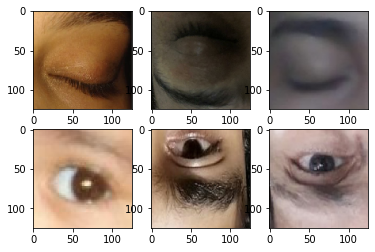

In [14]:
# Plot some images
batch = img_train.next()
images=batch[0]
for i in range(0,6):
  plt.subplot(2,3, i+1)
  plt.imshow(images[i])

In [5]:
# Import required packages
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image


In [6]:
# Build the structure of neural network
model = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3),activation='relu',input_shape=(125,125,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    Dense(32, activation='relu'),
    Dense(2, activation='sigmoid')
    ])

In [7]:
# Compile the model
model.compile(optimizer='adam',
            loss='binary_crossentropy',
            metrics=['accuracy'])

In [8]:
early_stop=EarlyStopping(monitor='loss', patience=2)

In [9]:
# Train the model
model.fit(img_train, epochs=10, callbacks=early_stop, validation_data=img_val)

Epoch 1/10
251/251 [==============================] - 738s 3s/step - loss: 0.2539 - accuracy: 0.8966 - val_loss: 0.1631 - val_accuracy: 0.9400
Epoch 2/10
251/251 [==============================] - 105s 417ms/step - loss: 0.0961 - accuracy: 0.9653 - val_loss: 0.1803 - val_accuracy: 0.9500
Epoch 3/10
251/251 [==============================] - 105s 419ms/step - loss: 0.0831 - accuracy: 0.9673 - val_loss: 0.2568 - val_accuracy: 0.9175
Epoch 4/10
251/251 [==============================] - 106s 421ms/step - loss: 0.0791 - accuracy: 0.9720 - val_loss: 0.2104 - val_accuracy: 0.9187
Epoch 5/10
251/251 [==============================] - 105s 417ms/step - loss: 0.0626 - accuracy: 0.9765 - val_loss: 0.1419 - val_accuracy: 0.9650
Epoch 6/10
251/251 [==============================] - 104s 414ms/step - loss: 0.0537 - accuracy: 0.9795 - val_loss: 0.1322 - val_accuracy: 0.9538
Epoch 7/10
251/251 [==============================] - 104s 414ms/step - loss: 0.0475 - accuracy: 0.9808 - val_loss: 0.1400 - va

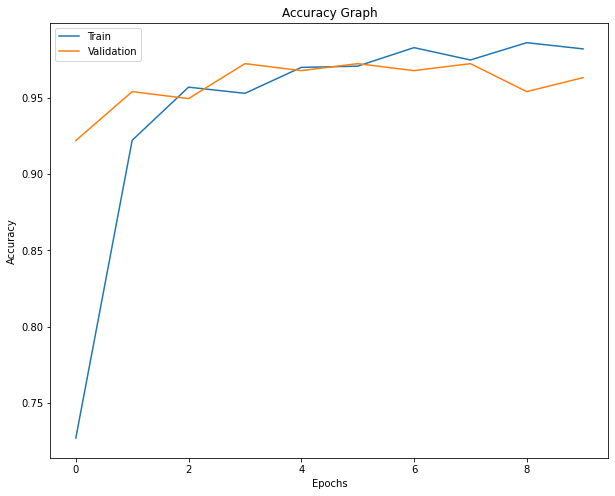

In [ ]:
# Accuracy Graph
fig=plt.figure(figsize=(10,8))
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title("Accuracy Graph")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

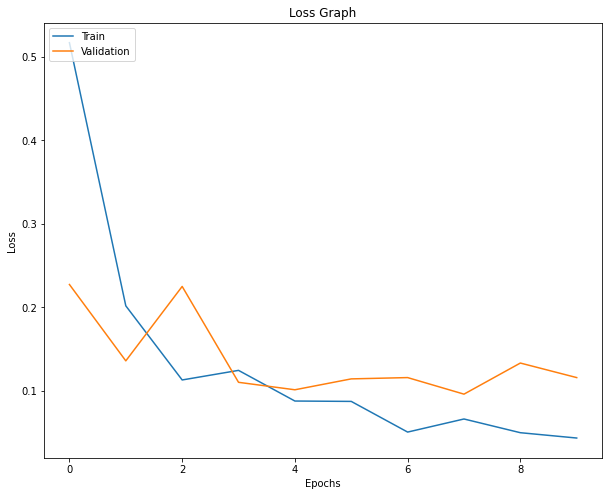

In [ ]:
# Plot Loss Graph
fig=plt.figure(figsize=(10,8))
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Graph')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
prediction=model.predict(img_val)

14/14 [==============================] - 3s 205ms/step


In [ ]:
list=[5]
for i in prediction:
  if i[0]>=0.5:
    print("Open eyes")
  else:
    print("closed eyes")
  break

Open eyes


In [10]:
model.save('Drowsiness_model.h5')

In [11]:
model=load_model('Drowsiness_model.h5')

## Let's try to train model using Transfer learning techniqe 

In [18]:
#We use Inseption-v3 Transfer learning technique for training model
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dropout,Flatten, Input, Dense, MaxPool2D
from tensorflow.keras.models import Model

In [19]:
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(125,125,3))
hmodel = base_model.output

87910968/87910968 [==============================] - 1s 0us/step


In [20]:
for layers in base_model.layers:
  layers.trainable=False

In [21]:
# Define last layer
hmodel=Flatten()(hmodel)
hmodel=Dense(64, activation='relu')(hmodel)
hmodel=Dropout(0.5)(hmodel)
hmodel=Dense(2, activation='sigmoid')(hmodel)

model_2 = Model(inputs=base_model.input,outputs=hmodel)
model_2.summary 

<bound method Model.summary of <keras.engine.functional.Functional object at 0x7f369454c6a0>>

In [ ]:
model_2.summary()

In [22]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [23]:
# define early-stop and learning rate for use in training
early_stop= EarlyStopping(monitor='val_loss',patience=4, verbose=3, restore_best_weights=True)
learning_rate = ReduceLROnPlateau(monitor='val_loss', patience=4,verbose=3)
callbacks=[learning_rate,early_stop]

In [25]:
# Compile and train the model
model_2.compile(optimizer='Adam', loss='binary_crossentropy',metrics=['accuracy'])
model_2.fit(img_train,
            batch_size=16,
            epochs=10,
            validation_data=img_val, 
            callbacks=callbacks)

Epoch 1/10
251/251 [==============================] - 195s 746ms/step - loss: 0.1871 - accuracy: 0.9236 - val_loss: 0.0836 - val_accuracy: 0.9638 - lr: 0.0010
Epoch 2/10
251/251 [==============================] - 187s 742ms/step - loss: 0.1355 - accuracy: 0.9380 - val_loss: 0.0905 - val_accuracy: 0.9613 - lr: 0.0010
Epoch 3/10
251/251 [==============================] - 186s 740ms/step - loss: 0.1041 - accuracy: 0.9523 - val_loss: 0.0832 - val_accuracy: 0.9812 - lr: 0.0010
Epoch 4/10
251/251 [==============================] - 185s 738ms/step - loss: 0.0888 - accuracy: 0.9610 - val_loss: 0.0792 - val_accuracy: 0.9750 - lr: 0.0010
Epoch 5/10
251/251 [==============================] - 184s 735ms/step - loss: 0.0696 - accuracy: 0.9720 - val_loss: 0.0837 - val_accuracy: 0.9725 - lr: 0.0010
Epoch 6/10
251/251 [==============================] - 183s 731ms/step - loss: 0.0666 - accuracy: 0.9720 - val_loss: 0.0837 - val_accuracy: 0.9712 - lr: 0.0010
Epoch 7/10
251/251 [==========================

In [28]:
# save trained model in following location
model_2.save('C:\Users\Admin\Desktop\drowsiness detection\model\drowsiness_model3.h5')